In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

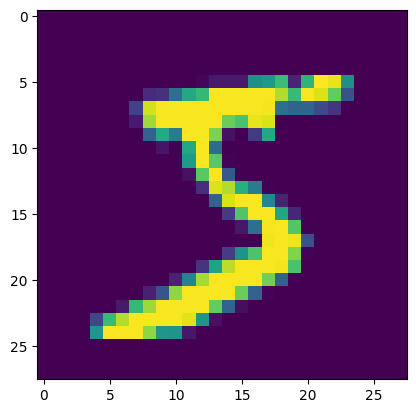

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

X_train.shape, X_test.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [ ]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

mnist_net = MNISTNet(100)

In [ ]:
# torch.cuda.is_available()

In [ ]:
# !nvidia-smi

In [ ]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# mnist_net = mnist_net.to(device)
# list(mnist_net.parameters())

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [ ]:
import pdb
batch_size = 1

# test_accuracy_history = []
# test_loss_history = []

# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)

        preds = mnist_net.forward(X_batch)
        print(preds)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        pdb.set_trace()
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
#     test_loss_history.append(loss(test_preds, y_test))

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
#     test_accuracy_history.append(accuracy)
    print(accuracy)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 336, in set_trace
    sys.settrace(self.trace_dispatch)



tensor([[-0.6675,  0.0020, -0.0088,  0.1256, -0.2235,  0.3136,  0.6034,  0.1269,
          0.1114, -0.0717]], grad_fn=<AddmmBackward0>)
> <ipython-input-16-b489b8a94740>(28)<cell line: 10>()
     26 
     27         pdb.set_trace()
---> 28         optimizer.step()
     29 
     30     test_preds = mnist_net.forward(X_test)

tensor([3])
tensor([[-0.6675,  0.0020, -0.0088,  0.1256, -0.2235,  0.3136,  0.6034,  0.1269,
          0.1114, -0.0717]], grad_fn=<AddmmBackward0>)
tensor(2.2558, grad_fn=<NllLossBackward0>)
> <ipython-input-16-b489b8a94740>(13)<cell line: 10>()
     11     order = np.random.permutation(len(X_train))
     12 
---> 13     for start_index in range(0, len(X_train), batch_size):
     14         optimizer.zero_grad()
     15 

> <ipython-input-16-b489b8a94740>(14)<cell line: 10>()
     12 
     13     for start_index in range(0, len(X_train), batch_size):
---> 14         optimizer.zero_grad()
     15 
     16         batch_indexes = order[start_index:start_index+batch_si

In [ ]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);